In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_forgmat = "svg"
#from pymc3 import *


# Python basics

## Arrays

In [2]:
a = [1,2.0,3.0,3,4]
print(a)
a.append(5)
a

[1, 2.0, 3.0, 3, 4]


[1, 2.0, 3.0, 3, 4, 5]

In [3]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
a[0:3]

[1, 2.0, 3.0]

In [5]:
# here are some things it will be helpful to know how to do
# make an empty python list
a = [1,2,3]

# append something to the array
a.append(5)
print(a)
# index an array
print(a[2])
print(a[0:2])

# easy way to make an array
range(0,5)

[1,2,3,4]

[1, 2, 3, 5]
3
[1, 2]


[1, 2, 3, 4]

In [6]:
# we can use numpy to make an array
a = np.zeros(5)
a = np.array([0,0,0,0,0])
# advantage of numpy arrays:
a = np.array([1,2,3])
b = np.array([5,3,2])
print(a + b)
# compare to
[1,2,3] + [5,3,2]

[6 5 5]


[1, 2, 3, 5, 3, 2]

In [7]:
# can make list with linspace
a = np.linspace(1,3,5)
a

array([1. , 1.5, 2. , 2.5, 3. ])

In [8]:
range(5)[1]

1

In [9]:
# Create the DataFrame
x = np.linspace(0,1,10)
df = pd.DataFrame({'Column1': x,
    'Column2': ['A', 'B', 'C', 'D', 'E','F','G','H','I','J']})
df

,Column1,Column2
0,0.000000,A
1,0.111111,B
2,0.222222,C
3,0.333333,D
4,0.444444,E
5,0.555556,F
6,0.666667,G
7,0.777778,H
8,0.888889,I
9,1.000000,J


In [10]:
df.Column1.values

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [11]:
# imagine we have an array of times and corresponding tempature measurements:
times = np.array([1,2,3,4,5])
temps = np.array([72,71,75,75,73])
# we can make a 2d numpy array
data = np.transpose(np.array([times,temps]))
data

# the pandas library provides a convenient way organize this data
import pandas as pd
df = pd.DataFrame(data,columns = ["time","tempature"])
df[df.time <4]

# this is how we get back the numpy array
df.time.values

array([1, 2, 3, 4, 5])

## Control

In [12]:
for i in [1,2,3,4]:
  print(i)

1
2
3
4


In [13]:
np.array(range(5))

array([0, 1, 2, 3, 4])

In [14]:
k = 4
for i in range(5):
  k = k + i
  print(k)

4
5
7
10
14


In [15]:
i = 0
while i<10:
  print(i)
  i = i+1


0
1
2
3
4
5
6
7
8
9


# Statistical modeling with Python

In [16]:
y = np.random.choice([0,1],1000,p=[0.5,0.5])
y = []
for j in range(1000):
  y.append(np.random.choice([0,1],p=[0.5,0.5]))

In [17]:
n_samples = 100
q = 0.5
y = np.random.choice([0,1],n_samples,p=[q,1-q])
y


array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

## Example 3

Let $J$ denote a random variable representing the number of times a coin is flipped before two heads appear in a row.

In [18]:
def flip_until_two():
  num_heads = 0
  total_flips = 0
  while num_heads <2:
    y = np.random.choice([0,1])
    if y == 0:
      num_heads = 0
    else:
      num_heads = num_heads + 1
    total_flips = total_flips + 1
  return total_flips

# Visualizing data

Text(0, 0.5, 'y')

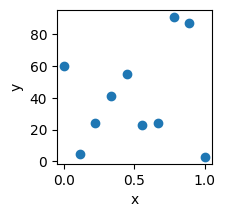

In [19]:
x = np.linspace(0,1,10) # generate 10 numbers between 0 and 1
y = np.random.choice(range(100),len(x)) # generate 10 random numbers

fig,ax = plt.subplots(figsize=(2,2));# this sets up an axis to plot on
ax.plot(x,y,"o")
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'x^2')

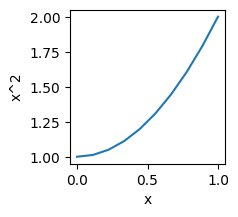

In [20]:
x = np.linspace(0,1,10) # generate 10 numbers between 0 and 1
y = x**2 + 1 # generates the square of each number in the list x plus 1

fig,ax = plt.subplots(figsize=(2,2));# this sets up an axis to plot on
ax.plot(x,y,"-")
ax.set_xlabel("x")
ax.set_ylabel("x^2")

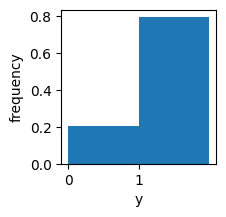

In [21]:
fig,ax = plt.subplots(figsize=(2,2));
n_samples = 10000
q = 0.2
y = np.random.choice([0,1],n_samples,p=[q,1-q])
plt.hist(y,density=True,bins=[0,1,2]); # the bins are [0,1) and [1,2)
ax.set_xlabel("y")
ax.set_ylabel("frequency")
ax.set_xticks([0,1])

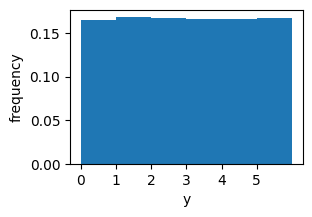

In [22]:
n_samples = 100000
outcomes = list(range(6))
# model of a die
y = np.random.choice(outcomes,n_samples,p = [1/6,1/6,1/6,1/6,1/6,1/6])

fig,ax = plt.subplots(figsize=(3,2));
plt.hist(y,bins=[0,1,2,3,4,5,6],density=True);
ax.set_xlabel("y")
ax.set_ylabel("frequency")
ax.set_xticks(outcomes);

In [23]:
# imagine we have an array of times and corresponding tempature measurements:
times = np.array([1,2,3,4,5])
temps = np.array([72,71,75,75,73])
# we can make a 2d numpy array
data = np.transpose(np.array([times,temps]))
data

# the pandas library provides a convenient way organize this data
import pandas as pd
df = pd.DataFrame(data,columns = ["time","tempature"])
df[df.time <4]

,time,tempature
0,1,72
1,2,71
2,3,75


In [24]:
# let try working with some real data
df = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/KidIQ/data/kidiq.csv")
df.kid_score.values;

Text(0.5, 0, 'score')

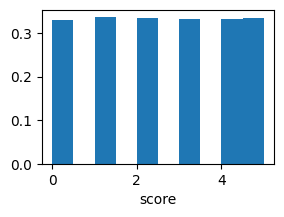

In [25]:
fig,ax = plt.subplots(figsize=(3,2));
ax.hist(y,density=True,bins = 10);
ax.set_xlabel("score")

Text(0.5, 0, 'score')

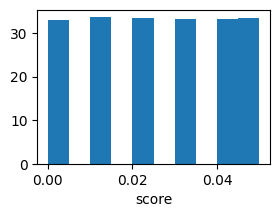

In [26]:
# the bar heights are NOT probabilities and they may be greater than 1
fig,ax = plt.subplots(figsize=(3,2));
ax.hist(y/100,density=True,bins = 10);
ax.set_xlabel("score")

# Monte Carlo simulation

## Example 4

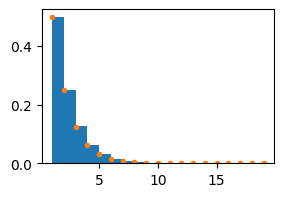

In [27]:
q = 1/2
Y = np.random.geometric(q,20000)
k_range = np.array(range(1,20))

fig,ax = plt.subplots(figsize=(3,2));
ax.hist(Y,density=True,bins = k_range);
ax.plot(k_range,(1-q)**(k_range -1)*q,".")

## Example

Suppose we flip a coin until we get 2 heads in a row, as we implemented above, and let J denote the number of flips.
* Use Monte Carlo simulations, estimate the chance that J > 5. Start by generating 10000 samples
* Plot a histogram and confirm that the histogram is consistent with you computation

In [28]:
n_monte = 10000
Js = np.zeros(n_monte)
for k in range(n_monte):
  Js[k] = flip_until_two()
len(Js[Js>5])/len(Js)

0.4017

0.4017


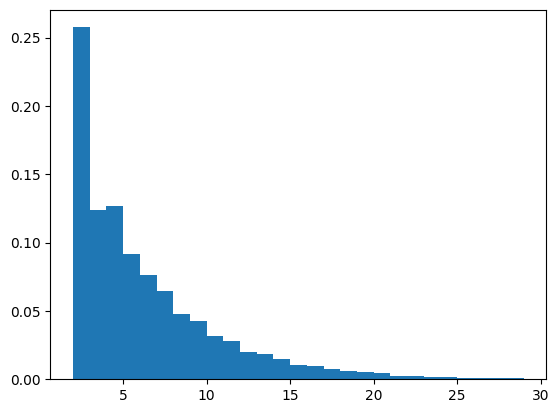

In [29]:
print(len(Js[Js>5])/len(Js))
plt.hist(Js,bins = range(2,30),density=True);


In [30]:
1 - (.25 + 2*.13)

0.49

Text(0, 0.5, 'fraction J<5')

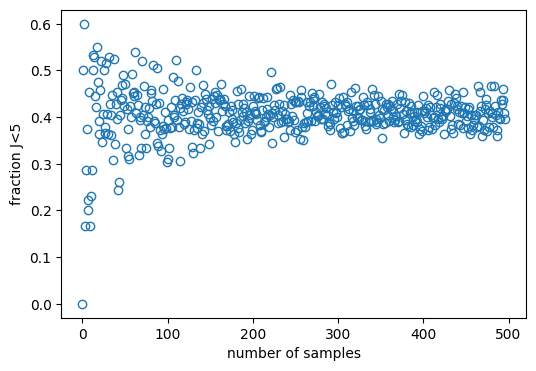

In [31]:
# we should always check we ran them long enough
n_range = range(3,500)
est = np.zeros(len(n_range))
for j in range(len(n_range)):
  n_monte = n_range[j]
  Js = np.zeros(n_monte)
  for k in range(n_monte):
    Js[k] = flip_until_two()
  est[j] = len(Js[Js>5])/len(Js)

fig,ax = plt.subplots(figsize=(6,4))
ax.plot(est,"o",fillstyle="none")
ax.set_xlabel("number of samples")
ax.set_ylabel("fraction J<5")

# Joint probabilities and independence

## Example 5 and 6

Write python code to generate a sample of $Y_A$ and $Y_B$. Using Monte carlo simulations to show they are not independent?




In [32]:
x = np.random.choice([1,2,3,4],1000000,p=[1/2,1/8,1/8,1/4])
x_yb0 = x[(x==1)|(x==3)]
n_b0 = len(x_yb0) # n(Y_B = 0)
n_both0 = len(x[x==1])
n_both0/n_b0

0.8000150285302258

## Example

We can also condition on events, rather than the value of a variable. Using the data on kids test scores
* what is the chance a test score is greater than $75$ among students whose mothers attended high school?
* Based on the data, do the test scores seem independent of mother education?

In [33]:
# let try working with some real data
df = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/KidIQ/data/kidiq.csv")
y = df.kid_score.values
df

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


In [34]:
y_hs = df[df.mom_hs ==1].kid_score.values
print(len(y_hs[y_hs > 95])/len(y_hs))


y = df.kid_score.values
print(len(y[y>95])/len(y))

0.41348973607038125
0.3778801843317972


In [35]:
y_nohs = df[df.mom_hs !=1].kid_score.values
len(y_nohs[y_nohs > 95])/len(y_nohs)

y_all = df.kid_score.values

Text(0, 0.5, 'P(score>z|mom_hs)')

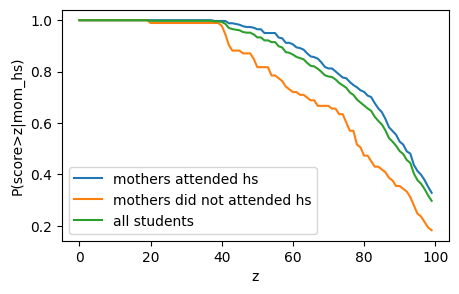

In [36]:
fig,ax = plt.subplots(figsize=(5,3))
plt.plot([len(y_hs[y_hs > z])/len(y_hs) for z in range(100)],label="mothers attended hs")
plt.plot([len(y_nohs[y_nohs > z])/len(y_nohs) for z in range(100)],label="mothers did not attended hs")
plt.plot([len(y_all[y_all > z])/len(y_all) for z in range(100)],label="all students")
ax.legend()
ax.set_xlabel("z")
ax.set_ylabel("P(score>z|mom_hs)")

# Mean and variances

## Example

Verify that the formula for the mean of bernoulli distribution and standard deviations with Monte Carlo simulations
\begin{equation}
\mathbb{E}[Y] = q
\end{equation}

In [37]:
# define function to draw samples anand compute mean and standard deviation of bernoulli random variable
def mean_bern(q):
  sample = np.random.choice([0,1],500,p=[1-q,q])
  return np.var(sample)

In [38]:
q_range = np.linspace(0,1,100)

Text(0, 0.5, 'average')

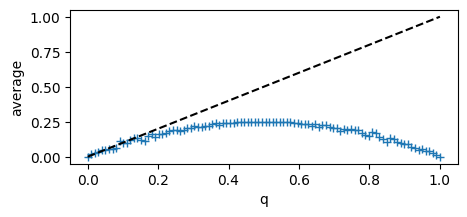

In [39]:


q_range = np.linspace(0,1,100) # generates one hundred evenly spaced numbers between 0 and 1
means = np.zeros(len(q_range))
for j in range(len(q_range)):
  means[j] = mean_bern(q_range[j])
# another way to do this is
means = [mean_bern(q_range[j]) for j in range(len(q_range))]
# make the plot
fig,ax = plt.subplots(figsize=(5,2))
# plot q_range vs. means
ax.plot(q_range,means,"+")
ax.plot(q_range,q_range,"k--")
ax.set_xlabel("q")
ax.set_ylabel("average")

## Exercise

Verify the formula for the variance

\begin{equation}
{\rm Var}(Y) = q(1-q)
\end{equation}

To do this you can use the fact that pointwise arithmetic between numpy arrays can be performed directly on the ways, e.g. ``q_range*q_range`` makes a list where every element is the corresponding element of ``q_range`` squared. You should experiment to ensure you are using enough samples.